# Project 1: Seattle's Weather - An Opportunity for Logistic Regression

<img align="center" src="rainy-seattle.png" width=700, height=200>

## Table of Content

**0. Preliminaries**
   
   0.1. *A Short Background* <br>
   0.2. *Goals of the Project* <br>
   0.3. *Software and Packages*<br>
   0.4. *Data Resources*
   
**1. Getting and Cleaning the Raw Data**

   1.1. *Importing the Necessary Libraries*<br>
   1.2. *Getting the Raw Data* <br>
   1.3. *Cleaning the Data*
   
**2. Logistic Regression**

   2.1. *Binary Logistic Regression* <br>
   
   2.1.1. *Binary Logistic Regression with Two Features*<br>
   2.1.2. *Binary Logistic Regression with Three Features (A Naive Approach)*<br>
   2.1.3. *Binary Logistic Regression with Three Features (A More Refined Approach)*
        
   2.2. *Multinominal Logictic Regression* <br>
   
   2.2.1. *Multinominal Logistic Regression with Two Features*<br>
   2.2.2. *Multinominal Logistic Regression with Three Features*
   
**3. Conclusions and Possible Future Directions**

## 0. Preliminaries

### 0.1. A Short Background 

The major weather indicators of Seattle's weather have been recorded for more than 25000 consecutive days from 1948 to 2017. This data set is publicly accessible at Kaggle. In this data set, the minimum and the maximum temperatures of each day of the year for the period 1948 to 2017 have been recorded. Moreover, the rain situation for each day has been recorded as a True/False boolean variable. In a seperate column, the precipitation rates for rainy days have been recorded as well. In this project, we would like to employ the logistic regression method to build a simple model for predicting whether a typical day will be rainy.


### 0.2. Goals of the Project

In this project, we perform logistic regression at different levels:

1. In *section 2.1.1.*, we will first perform a supervised learning through logistic regression model by treating the maximum temperature ('TMAX') and the minimum temperature ('TMIN') as the two only features of our model. The boolean rain variable ('RAIN') will be regarded as our categorical target variable. We will perform a *binary logistic regression with two features* on our data set, and we will explore the success of our model. 


2. In *section 2.1.2.*, we will add one more feature to our model, and we will perform a *binary logistic regression with three features*. The new feature is built from the date ('DATE') variable. We will do this in two ways. First, we simply associated to each day of the year an integer in the range of 1 and 365 (i.e. the day number). We will call this the naive approach. As we will see this would not lead to a better overall performance of the model. We will discuss why this is the case at the end of the section. Next, we make a more refined variable for each day of the year. We associate an integer, called 'FREQUENCY', to each day of the year which basically counts how many times a given particular day of the year has been rainy during 1948-2017 (70 years). For instance, a frequency 40 for a given day of the year means that during the period 1948-2017, the day in cosideration has been rainy 40 times (out of 70 years). We will see that this new variable slightly amends the performance of the model.   


3. In *section 2.2.*, we will perform a multinominal logistic regression. We will use the precipitation variable of our dataset to create 4 classes (instead of only two classes rainy, and not rainy) for our taget variable. The four classes are No Rain, Light Rain, Moderate Rain, and Heavy Rain, in accordance with the classfications of NC Climate Office based on the value of the precipitation variable. In section 2.2.1., we will perform a multinominal logistic regression with only two features ('TMIN' and 'TMAX'), and in section 2.2.2., we will perform a multinominal logistic regression with three features ('TMIN','TMAX', and 'FREQUENCY').  

### 0.3. Software and Packages

We will use the following python libraries:

- For data wrangling, we use the standard *pandas* and *numpy* libraries.
- For data visualization and plotting, we use the standard *matplotlib* and *seaborn* libraries, as well as *mlxtend* library.
- For data training and logistic regression, we use various features of *scikit learn* library. 

### 0.4. Data Resources

1. Main source of data for Seattle's weather is found at kaggle.com through the following link:<br> 
https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017?select=seattleWeather_1948-2017.csv
2. NC Climate Office for Types of Precipitations: https://climate.ncsu.edu/edu/PrecipTypes

## 1. Getting and Cleaning the Raw Data

### 1.1. Importing Necessary Libraries

In [1]:
# Importing the common libraries for data wrangling and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mlxtend

In [2]:
# The homemade functions have been all collected in functions.py. We import this file for our project.

import functions

In [3]:
# Importing necessary components of scikit-learn needed for our project

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

### 1.2. Getting the Raw Data  

In [4]:
# Identifying the local path of the source csv file 

path='/Users/masoud/Dropbox/Private/UMBC-DataScience/DATA-601/Project-1/SeattleWeather.csv'

In [5]:
# Reading csv file as a dataframe

df=pd.read_csv(path)
df.shape

(25551, 5)

In [6]:
# A sample of 5 random rows of 'df'

df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN
3046,1956-05-04,0.14,53,48,True
23380,2012-01-05,0.05,48,37,True
12106,1981-02-22,0.00,56,38,False
6975,1967-02-05,0.00,48,33,False
5508,1963-01-30,0.00,32,26,False


### 1.3. Cleaning the Data

In [7]:
# Dropping all dates containing '-02-29' (the extra day of leap years) from the dataframe 'df'

df=df.drop(df[df['DATE'].str.contains('-02-29')].index)
df.reset_index(inplace=True)

In [8]:
# Making sure that the two columns 'PRCP' (precipitation) and 'RAIN' are consistent

df.loc[(df['RAIN']==False) & (df['PRCP']!=0)]
df.loc[(df['RAIN']==True) & (df['PRCP']==0)]

,index,DATE,PRCP,TMAX,TMIN,RAIN


In [9]:
# Assigning an integer between 1 and 365 to each row in the 'DAY' column through the function 'Date_Conversion'

df['DAY']=df['DATE'].apply(functions.Date_Conversion)
df.drop('index',axis=1,inplace=True)
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY
15563,1990-08-22,0.00,73,55,False,234
20257,2003-07-02,0.00,70,51,False,183
8746,1971-12-18,0.09,39,32,True,352
18433,1998-07-03,0.06,65,55,True,184
22047,2008-05-28,0.00,66,50,False,148


In [10]:
# Checking if there exist any missing values in any of the columns

t=[]
for col in df.columns:
    t.append(df[df[col].isna()])
pd.concat(t)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY
18402,1998-06-02,NaN,72,52,NaN,153
18403,1998-06-03,NaN,66,51,NaN,154
21052,2005-09-05,NaN,70,52,NaN,248
18402,1998-06-02,NaN,72,52,NaN,153
18403,1998-06-03,NaN,66,51,NaN,154
21052,2005-09-05,NaN,70,52,NaN,248


In [11]:
# Replacing the missing values by 0

df.PRCP.fillna(0,inplace=True)
df.RAIN.fillna(0,inplace=True)

In [12]:
# Confirming that there is no missing values after the above substitution

t=[]
for col in df.columns:
    t.append(df[df[col].isna()])
pd.concat(t)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY


Text(0, 0.5, 'Temperature (Fahrenheit)')

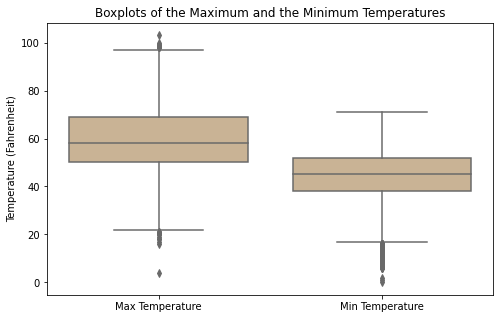

In [13]:
## Checking for outliers in maximum and minimum temperatures

plt.figure(figsize=(8,5))
BoxPlot_T = sns.boxplot(data=[df.TMAX,df.TMIN],color='tan')
plt.title('Boxplots of the Maximum and the Minimum Temperatures')
plt.xticks([0,1],['Max Temperature','Min Temperature'])
plt.ylabel('Temperature (Fahrenheit)')

In [14]:
# Replacing outliers by the appropriate bounds

LowerBound_MIN=17
LowerBound_MAX=22
UpperBound_MAX=97

df.TMIN=df.TMIN.apply(functions.Outlier_Elimination,args=(LowerBound_MIN,'L',))
df.TMAX=df.TMAX.apply(functions.Outlier_Elimination,args=(LowerBound_MAX,'L',))
df.TMAX=df.TMAX.apply(functions.Outlier_Elimination,args=(UpperBound_MAX,'U',))

Text(0, 0.5, 'Temperature (Fahrenheit)')

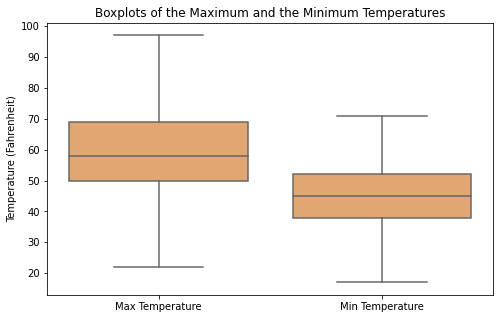

In [15]:
# Confirming that there is no outliers in the maximum and the minimum teperature columns

plt.figure(figsize=(8,5))
BoxPlot_T = sns.boxplot(data=[df.TMAX,df.TMIN],color='sandybrown')
plt.title('Boxplots of the Maximum and the Minimum Temperatures')
plt.xticks([0,1],['Max Temperature','Min Temperature'])
plt.ylabel('Temperature (Fahrenheit)')

## 2. Logistic Regression

### 2.1. Binary Logistic Regression

#### 2.1.1. Binary Logistic Regression with Two Features

In here, we run a binary logistic regression with two features. The two features are the daily minimum and maximum temperatures 'TMIN' and 'TMAX', and the target variable is 'RAIN' (which only takes True or False values).

In [16]:
# Defining a target variable that casts the rain status (0 if it does not rain, and 1 if it rains)

df['Target']=df.RAIN.map(lambda x: 1 if x==True else 0)

In [17]:
# Converting the predictors 'TMIN', 'TMAX', and the target variable 'Target' to numpy lists

X=df[['TMIN','TMAX']].to_numpy()
y=df.Target.to_numpy()

In [18]:
# Dividing the features and the target variable into the train and test categories 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1,stratify=y)

In [19]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[14644 10889]
[4393 3266]
[10251  7623]


In [20]:
# Instantiating logistic regression and fitting the train data

logreg = LogisticRegression(penalty = 'none', max_iter= 10000) 

logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=10000, penalty='none')

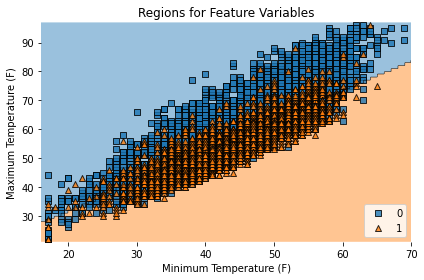

In [21]:
# Plotting the decision regions

mlxtend.plotting.plot_decision_regions(X=X_train, y=y_train,clf=logreg) 

plt.title('Regions for Feature Variables')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Maximum Temperature (F)') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 0: No Rain
## 1: Rain

In [22]:
# Comparing the prediction of the logistics regression for all test values

Predict_Class=logreg.predict_proba(X_test).argmax(axis=1)-y_test
Predict_Class[:20]

array([ 0, -1, -1, -1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  0])

In [23]:
# The rate of correct predictions

Prediction_rate=round(((len(Predict_Class)-np.count_nonzero(Predict_Class))/len(Predict_Class))*100,2)
print('The rate of correct predictions for the test data is= {}%'.format(Prediction_rate))

The rate of correct predictions for the test data is= 75.28%


**Side Check: Checking the Results with the *Standardized Data***

Although there is no hierarchy of scales in our problem at hand, we would like to check the results of logistic regression method when we use the standardized data. We do not expect to see a major difference.

In [24]:
# Standardizing the Data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
logreg = LogisticRegression(penalty = 'none', random_state=1)
logreg.fit(X_train_std, y_train)

LogisticRegression(penalty='none', random_state=1)

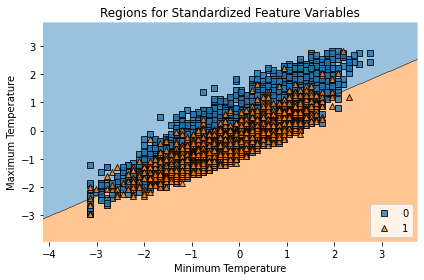

In [26]:
# Plotting the decision regions for the standardized data

mlxtend.plotting.plot_decision_regions(X=X_train_std, y=y_train,clf=logreg) 
plt.title('Regions for Standardized Feature Variables')
plt.xlabel('Minimum Temperature')
plt.ylabel('Maximum Temperature') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [27]:
# Comparing the prediction of the logistics regression for all test values

Predict_Class=logreg.predict_proba(X_test_std).argmax(axis=1)-y_test
Predict_Class[:20]

array([ 0, -1, -1, -1,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  0])

In [28]:
# The rate of correct predictions

Prediction_rate=round(((len(Predict_Class)-np.count_nonzero(Predict_Class))/len(Predict_Class))*100,2)
print('The rate of correct predictions for the test data is= {}%'.format(Prediction_rate))

The rate of correct predictions for the test data is= 75.28%


As expected earlier, we realize that the performance with the standardized data is barely different from the original performance.

#### 2.1.2. Binary Logistic Regression with Three Features (Naive Approach)

We now add one more feature to our model and run the logistic regression with three features. The three features are the minimum temperature 'TMIN', the maximum temperature 'TMAX', and the day number 'DAY'.

In [29]:
# Converting the features and the target variable to numpy arrays

X=df[['TMIN','TMAX','DAY']].to_numpy()
y=df.Target.to_numpy()

In [30]:
# Dividing the features and the target variable into the train and test categories 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1,stratify=y)

In [31]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[14644 10889]
[4393 3266]
[10251  7623]


In [32]:
# Instantiating logistic regression and fitting the train data

logreg = LogisticRegression(penalty = 'none', max_iter= 10000) 

logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=10000, penalty='none')

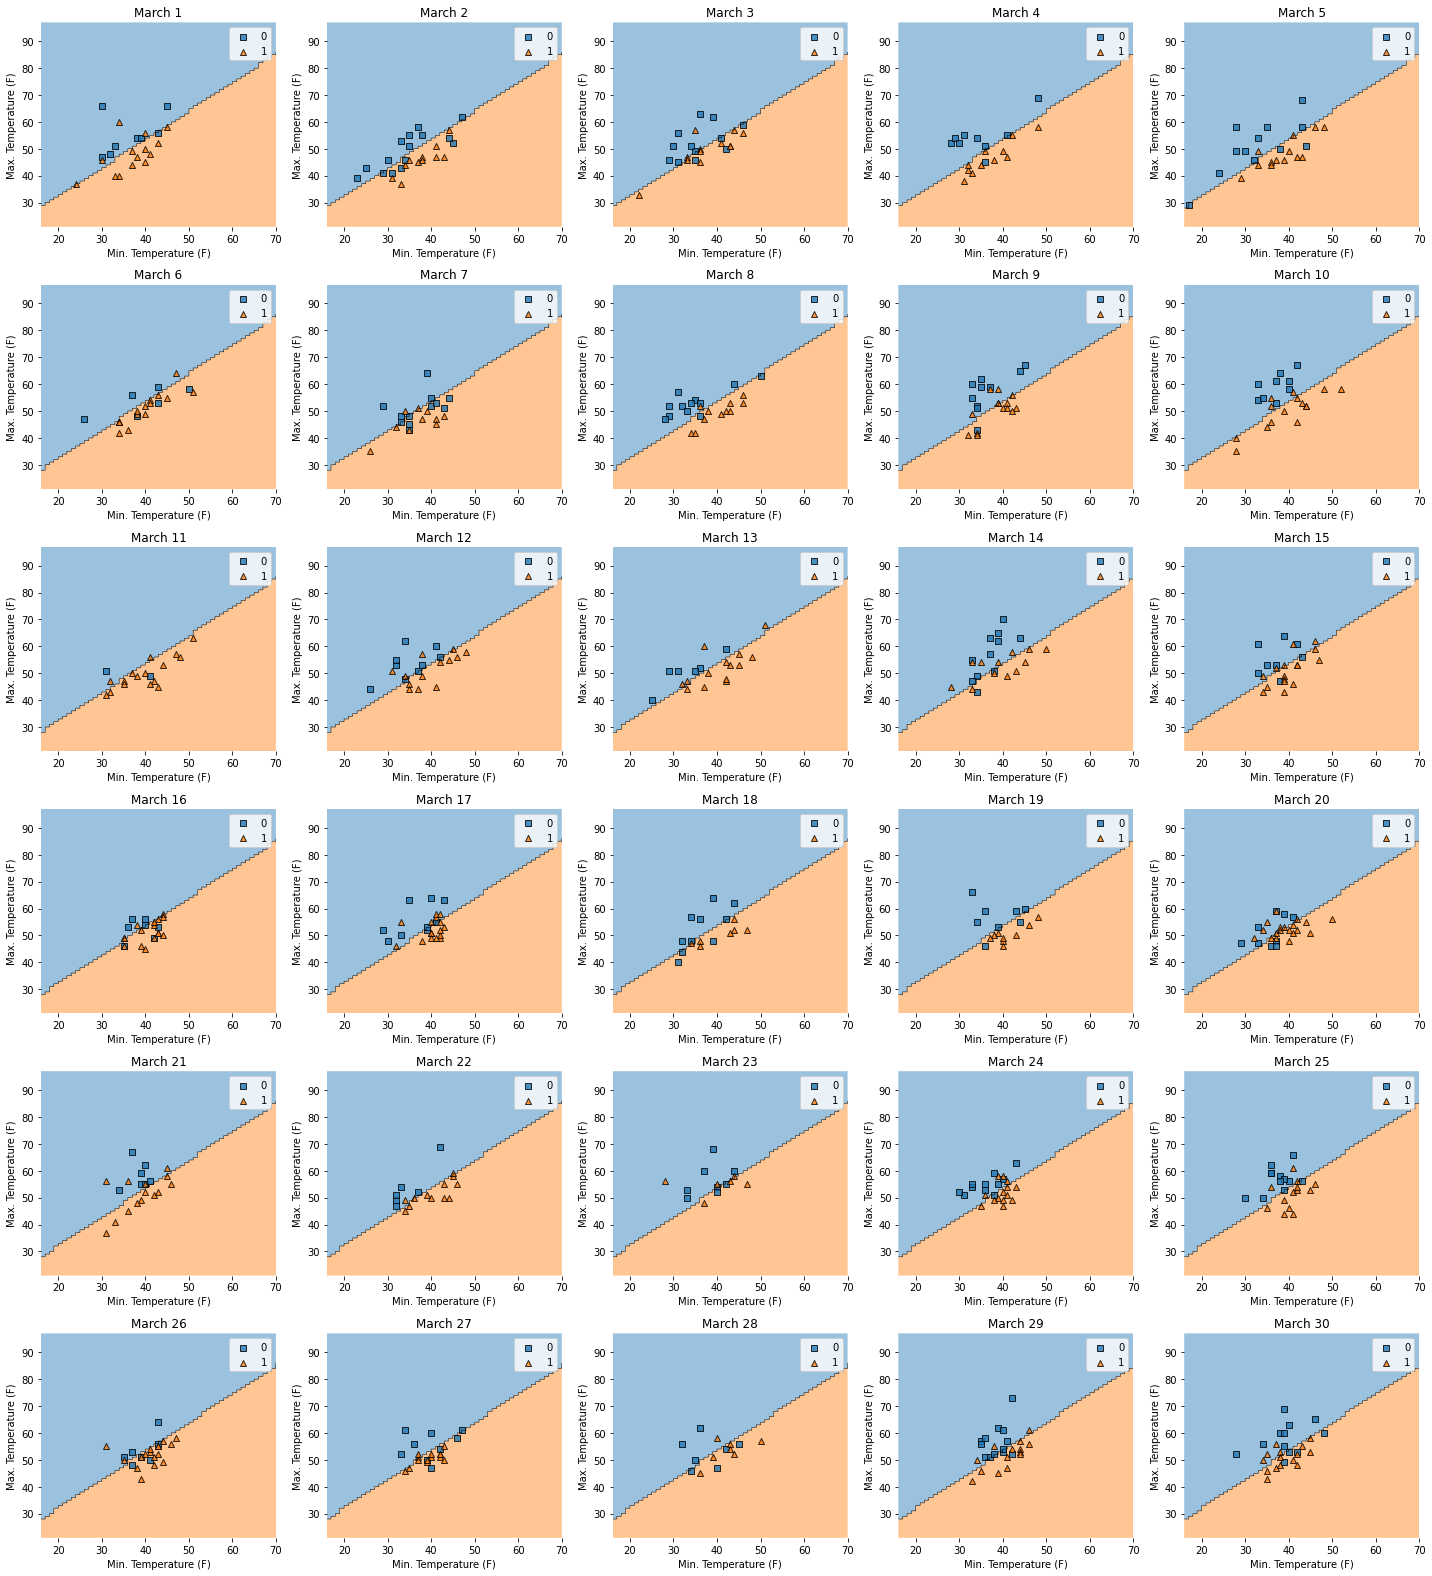

In [33]:
# Plotting the decision regions for the month 'March' (One can choose a different month if one desires)

value=59   ## Day=59 corresponds to March 1st of each year (One can choose a different day if one desires)
width=0.5

for i in range(value,value+30): 
    plt.gcf().set_size_inches((20,22))
    plt.subplot(6,5,i-value+1)
    mlxtend.plotting.plot_decision_regions(X=X_train, y=y_train,clf=logreg,filler_feature_values={2: i},
                      filler_feature_ranges={2: width},legend=2) 
    plt.title('March {}'.format(i-58))
    plt.xlabel('Min. Temperature (F)')
    plt.ylabel('Max. Temperature (F)') 
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [34]:
# Comparing the prediction of the logistics regression for 200 test values

Predict_Class=logreg.predict_proba(X_test).argmax(axis=1)-y_test
Predict_Class[:20]

array([ 0,  0, -1,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  1])

In [35]:
# The rate of correct predictions

Prediction_rate=round(((len(Predict_Class)-np.count_nonzero(Predict_Class))/len(Predict_Class))*100,2)
print('The rate of correct predictions for the test data is= {}%'.format(Prediction_rate))

The rate of correct predictions for the test data is= 75.5%


Our new feature 'DAY' does not improve the performance of the model, and there are two **potential problems** with this new feature:

   1. First, the range of variation of 'DAY' is any integer between 1 and 365. For each day of the year, there are only 70 data points. This is a bit low for statistical learnings. As we see, the above plots are under-populated and for a more reliable results, one would need more data.
   
   
   2. There is a more fundamental problem with our naive approach in this subsection. The logistic regression model is based on the sigmoid function. the sigmoid function is an strictly decreasing function. This implies that if the (continuous) feature variables are increased/decreased, the probability for success (class 1 in this context) or odds must increase/decrease as well. Our 'DAY' variable does not fulfill this condition. We see that in January where 1<DAY<30, the chance of having rainy days is high. But then in July where 180<DAY<210, the probability of having rainy days severely decreases. In the fall, where 300<DAY<365, again the chance of having rainy days inceases. 
   
   
Because of the above two problems, we need to add a more refined feature so that it will be compatible with the logical nature of logistic regression. We address this in next subsection. 

#### 2.1.3. Binary Logistic Regression with Three Features (A More Refined Approach)

Because of the above mentioned problems (specially problem 2), we modify our third feature. We would like to come up with a variable which avoids problem 2 described above. To achieve this, we assign a new integer, called 'FREQUENCY', to each day of the year. Given a particular day of the year, we count how many times (during the period 1948-2017) the day has been rainy. For instance, for January 1st, we count how many times this day (Jan. 1) has been rainy during the period 1948-2017. This new variable cures problem 2 observed above. Now, higher values of 'FREQUENCY' correspond to higher probabilities for rainy days, and similarly, lower values of 'FREQUENCY' correspond to lower probabilities for rainy days.   

In [36]:
# Defining the new feature 'FREQUENCY'

frequency_list=[]

for k in range(1,366):
    t=0
    for m in range(len(df)):
        if df['DAY'][m]==k:
            t += df['Target'][m]
    frequency_list.append(t)    
    
df['FREQUENCY']=0
for m in range(len(df)):
    df['FREQUENCY'][m]=frequency_list[m%365]

/Users/masoud/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
# Checking a random sample of 5 rows of the new 'df' with the added new feature

df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,Target,FREQUENCY
24284,2014-07-14,0.00,82,59,False,195,0,11
1437,1951-12-09,0.00,40,29,False,343,0,45
11036,1978-03-28,0.15,57,46,True,87,1,35
22777,2010-05-28,0.45,53,50,True,148,1,29
1238,1951-05-24,0.26,57,48,True,144,1,20


In [38]:
# Converting the features and the target variable to numpy arrays

X=df[['TMIN','TMAX','FREQUENCY']].to_numpy()
y=df.Target.to_numpy()

In [39]:
# Dividing the features and the target variable into the train and test categories 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1,stratify=y)

In [40]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[14644 10889]
[4393 3266]
[10251  7623]


In [41]:
# Instantiating logistic regression and fitting the train data

logreg = LogisticRegression(penalty = 'none', max_iter= 10000) 

logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=10000, penalty='none')

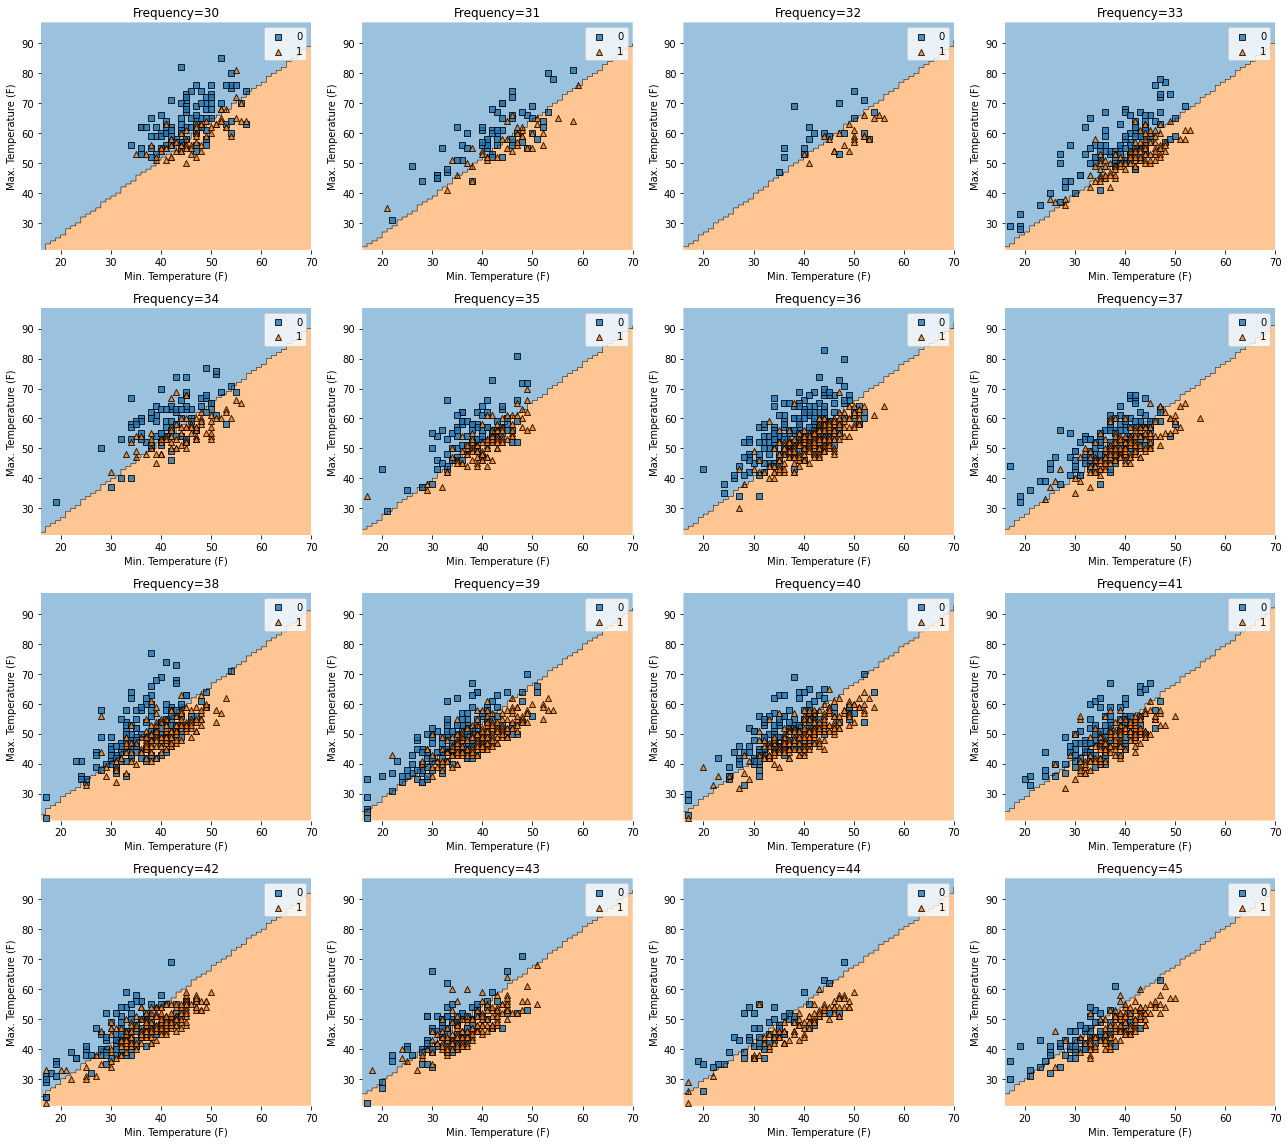

In [42]:
# Plotting the decision regions for different cross sections of the third feature 'FREQUENCY'

value=30
width=0.5

for i in range(value,value+16): 
    plt.gcf().set_size_inches((18,16))
    plt.subplot(4,4,i-value+1)
    mlxtend.plotting.plot_decision_regions(X=X_train, y=y_train,clf=logreg,filler_feature_values={2: i},
                      filler_feature_ranges={2: width},legend=2) 
    plt.title('Frequency={}'.format(i))
    plt.xlabel('Min. Temperature (F)')
    plt.ylabel('Max. Temperature (F)')  
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

As it is realized in above plots, the decision regions are less degenerate compared to the two feature case.

In [43]:
# Comparing the prediction of the logistics regression for 200 test values

Predict_Class=logreg.predict_proba(X_test).argmax(axis=1)-y_test
Predict_Class[:20]

array([ 0, -1,  0,  0,  0,  1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  1,  0,
        1,  0,  0])

In [44]:
# The rate of correct predictions

Prediction_rate=round(((len(Predict_Class)-np.count_nonzero(Predict_Class))/len(Predict_Class))*100,2)
print('The rate of correct predictions for the test data is= {}%'.format(Prediction_rate))

The rate of correct predictions for the test data is= 76.12%


It is also realized that the rate of correct predictions has slightly improved compared to the two feature case!

### 2.2. Multinominal Logistic Regression

According to NC Climate Office, the following classes are assigned to the value of the precipitations:

------------------------------
| Precipitation | Rain Class  | Class Number |
| :---   |  :--- | :-:  |
| PRCP = 0     |  No Rain | 0 |
| 0.01 < PRCP < 0.1 |  Light Rain | 1 |
| 0.1 < PRCP < 0.3  | Moderate Rain | 2 |
|  PRCP > 0.3    | Heavy Rain | 3 |


We use the precipitation variable 'PRCP' and the above table to create 4 classes for our target variable.


#### 2.2.1 Multinominal Logistic Regression with Two Features

In this section, we perform a multinominal logistic regression analysis with 4 classes and two features, namely the maximum and minimum temperatures 'TMAX' and 'TMIN'. 

In [45]:
# Defining the four classes: '0: No rain', '1: Light rain', '2: Moderate rain', '3: Heavy rain'

df['RAIN_CLASS']=0
df.RAIN_CLASS=df.PRCP.apply(functions.precipitation_type)
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,DAY,Target,FREQUENCY,RAIN_CLASS
16437,1993-01-13,0.0,39,32,False,13,0,45,0
11231,1978-10-09,0.0,65,53,False,282,0,32,0
2742,1955-07-07,0.0,61,47,False,188,0,13,0
6082,1964-08-31,0.0,65,47,False,243,0,16,0
20317,2003-08-31,0.0,77,57,False,243,0,16,0


In [46]:
# Converting the features and the target variable to numpy arrays

X=df[['TMIN','TMAX']].to_numpy()
y=df.RAIN_CLASS.to_numpy()

In [47]:
# Dividing the features and the target variable into the train and test categories 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1,stratify=y)

In [48]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[14644  4310  3612  2967]
[4393 1293 1083  890]
[10251  3017  2529  2077]


In [49]:
# Instantiating logistic regression and fitting the train data

logreg = LogisticRegression(penalty = 'none', max_iter= 10000) 

logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=10000, penalty='none')

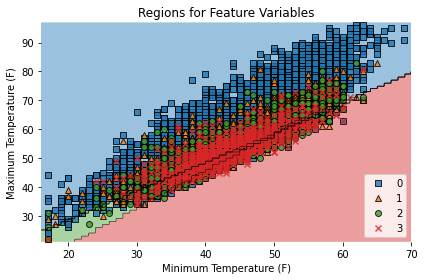

In [50]:
# Plotting the decision regions for different cross sections of the third feature 'FREQUENCY'

mlxtend.plotting.plot_decision_regions(X=X_train, y=y_train,clf=logreg) 
plt.title('Regions for Feature Variables')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Maximum Temperature (F)') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

As is observed from the above plot, decision regions are highly degenerate, and disentangling these regions with a very limited number of features may not be possible.

In [51]:
# Comparing the prediction of the logistics regression for all test values

Predict_Class=logreg.predict_proba(X_test).argmax(axis=1)-y_test
Predict_Class[:20]

array([ 0,  0, -1,  0,  0, -3,  0,  0,  2,  0,  0, -2, -2, -2,  0,  0,  0,
       -1,  0, -1])

In [52]:
# The rate of correct predictions

Prediction_rate=round(((len(Predict_Class)-np.count_nonzero(Predict_Class))/len(Predict_Class))*100,2)
print('The rate of correct predictions for the test data is= {}%'.format(Prediction_rate))

The rate of correct predictions for the test data is= 58.93%


It is also worth noticing that the rate of the successful predications of the model has dropped by at least 15%. 

#### 2.2.2. Multinominal Logistic Regression with Three Features

In this section, we perform a multinominal logistic regression with 4 classes for the target variable and three features 'TMAX', 'TMIN', and 'FREQUENCY'.

In [53]:
# Converting the features and the target variable to numpy arrays

X=df[['TMIN','TMAX','FREQUENCY']].to_numpy()
y=df.RAIN_CLASS.to_numpy()

In [54]:
# Dividing the features and the target variable into the train and test categories 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=1,stratify=y)

In [55]:
# Checking the distribution of the train and test categories for the target variable 

print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[14644  4310  3612  2967]
[4393 1293 1083  890]
[10251  3017  2529  2077]


In [56]:
# Instantiating logistic regression and fitting the train data

logreg = LogisticRegression(penalty = 'none', max_iter= 10000) 

logreg.fit(X_train, y_train) 

LogisticRegression(max_iter=10000, penalty='none')

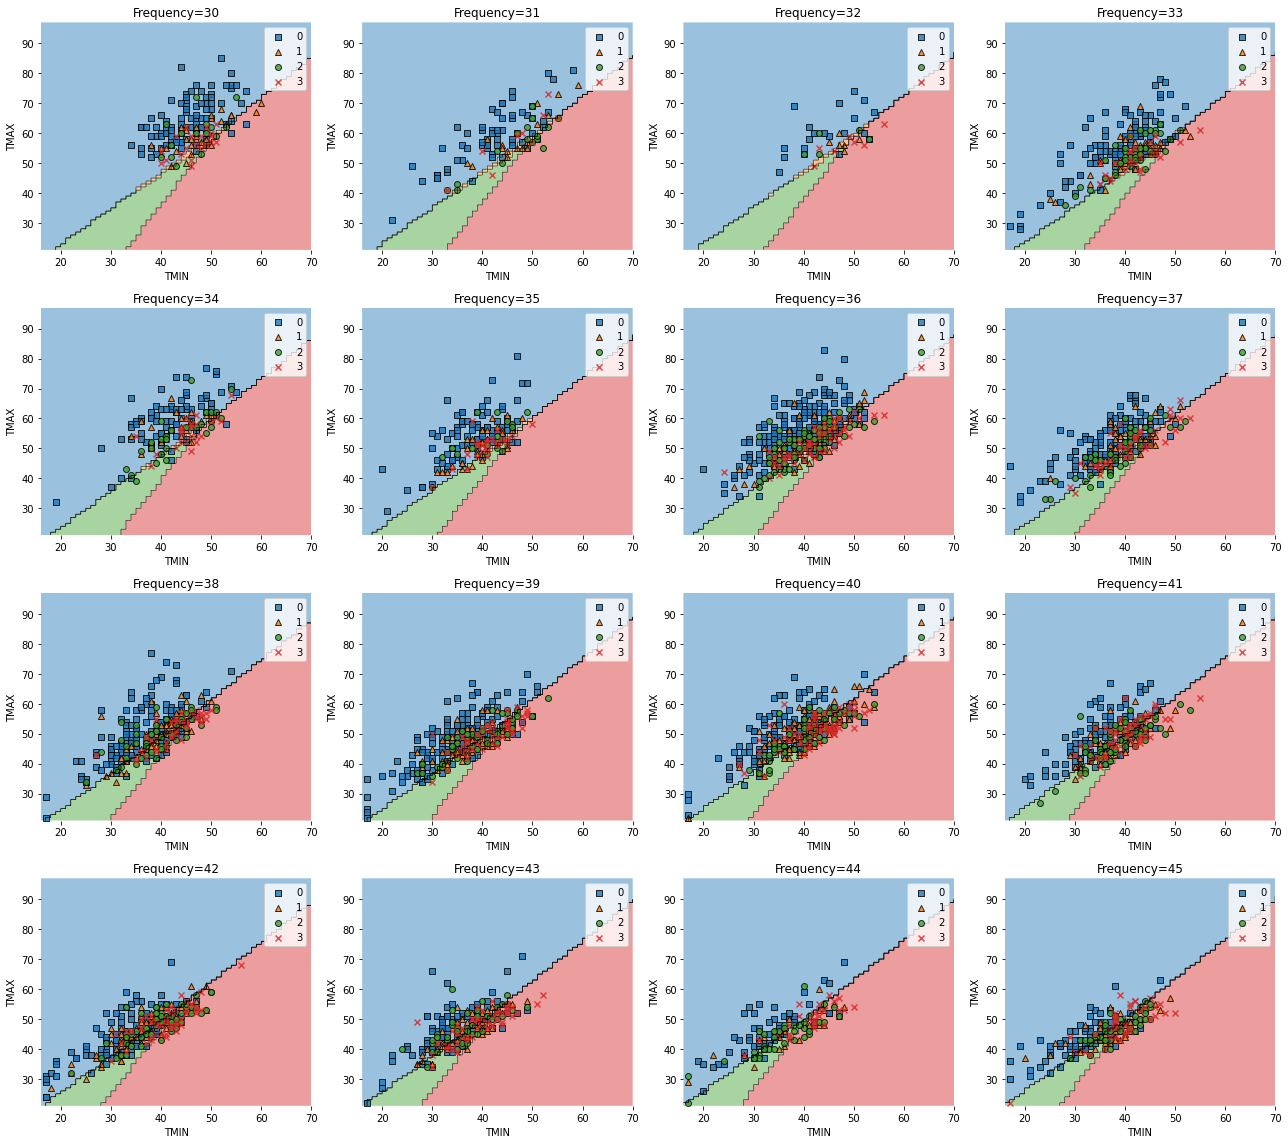

In [57]:
# Plotting the decision regions for different cross sections of the third feature 'FREQUENCY'

value=30
width=0.5

for i in range(value,value+16): 
    plt.gcf().set_size_inches((18,16))
    plt.subplot(4,4,i-value+1)
    mlxtend.plotting.plot_decision_regions(X=X_train, y=y_train,clf=logreg,filler_feature_values={2: i},
                      filler_feature_ranges={2: width},legend=2) 
    plt.title('Frequency={}'.format(i))
    plt.xlabel('TMIN')
    plt.ylabel('TMAX') 
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

As observed above, even in the presence of the third feature, the decision regions are still highly degenerate. 

In [58]:
# Comparing the prediction of the logistics regression for all test values

Predict_Class=logreg.predict_proba(X_test).argmax(axis=1)-y_test
Predict_Class[:20]

array([ 0,  0, -1,  0,  0,  0,  0,  0,  2,  0,  0, -1, -2, -2,  0,  0,  0,
       -1,  2, -1])

In [59]:
# The rate of correct predictions

Prediction_rate=round(((len(Predict_Class)-np.count_nonzero(Predict_Class))/len(Predict_Class))*100,2)
print('The rate of correct predictions for the test data is= {}%'.format(Prediction_rate))

The rate of correct predictions for the test data is= 59.77%


The rate of the correct predictions slightly improves in the presence of the third variable, but it is still far from an optimal performance.

## 3. Conclusions and Possible Future Directions

In this project, we employed logistic regression to predict whether in a given day of the year with its given maximum and minimum temperatures it will rain. We performed both binary (for Rain vs No Rain) and multinominal (for No Rain, Light Rain, Moderate Rain, Heavy Rain) logistics regressions in our analysis. At the end of this analysis, we draw the following conclusions:

  1. As is observed by the decision regions plots, the data is highly degenerate. Nonetheless, the binary logistic regression is predicting the class of the target variable for 75% of the test data.
  
  
  2. When a third feature is correctly added (*i.e.* consistent with the nature of the logistics regression as we saw in section 2.1.3.) to the analysis of binary logistic regression, the decision regions are less degenerate, and the rate of the correct predictions for the test data slightly improves. 
  
  3. When more classes added to the model, the rate of the correct predictions for test data drops by at least 15%. This is an indicator of the fact that the multiclass model is very complex, and one cannot optimally analyze the model with only very few features. Perhaps, adding more variables/features such as the air pressure, the speed and the direction of the wind would improve the analysis. However, it is worth noticing that when we add our third feature (*i.e.* FREQUENCY), we do see a slightly better performance, just as the case of the binary analysis.
  

It would be interesting to extend our analysis in future in two different directions:


  1. The logistic regression analysis we performed here is based on the sigmoid function. It would be interesting to perform a similar modeling with other bounded functions that one can take into consideration.
  
  
  2. It would be interesting to examine other machine learning algorithms (different from logistic regression) on the same dataset and compare the performances of different models. 